# Loan Prediction

## Loading Data 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

## Data Cleaning 

In [7]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train1 = train.copy()

In [33]:
train1.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [34]:
train1['Gender'].fillna('Male',inplace=True)
train1.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [36]:
train1.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [37]:
train1['Married'].fillna('Yes',inplace=True)
train1.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [39]:
train1.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [40]:
train1['Dependents'].fillna('0',inplace=True)
train1.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [41]:
train1.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [42]:
train1['Self_Employed'].fillna('No',inplace=True)
train1.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [47]:
train1.LoanAmount.value_counts().head()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
Name: LoanAmount, dtype: int64

In [48]:
train1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
train1['LoanAmount'].fillna(train1['LoanAmount'].median(), inplace=True)
train1['LoanAmount'].isna().sum()

0

In [51]:
train1.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [52]:
train1['Loan_Amount_Term'].fillna('360.0',inplace=True)
train1.Loan_Amount_Term.isna().sum()

0

In [56]:
train1['Loan_term']=train1['Loan_Amount_Term'].map(lambda x: float(x))

In [58]:
train1 = train1.drop('Loan_Amount_Term',1)
train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_term
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y,360.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,360.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,360.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,360.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,360.0


In [61]:
train1['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [62]:
train1['Credit_History'].fillna(train1['Credit_History'].median(),inplace=True)
train1['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [64]:
train1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_term
ApplicantIncome,1.000000,-0.116605,0.565181,-0.018615,-0.046531
CoapplicantIncome,-0.116605,1.000000,0.189218,0.011134,-0.059383
LoanAmount,0.565181,0.189218,1.000000,-0.000607,0.036960
Credit_History,-0.018615,0.011134,-0.000607,1.000000,-0.004705
Loan_term,-0.046531,-0.059383,0.036960,-0.004705,1.000000


In [ ]:
#train1.Loan_Status = train1['Gender'].map(lambda x: 1 if x=='Male')

In [63]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Loan_term            614 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


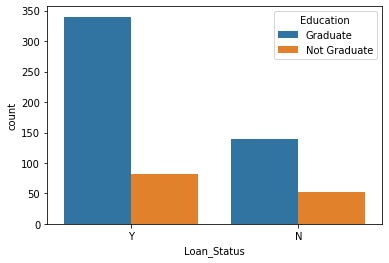

In [79]:
sns.countplot(x= train1['Loan_Status'],data = train1, hue= 'Education')

### graduate's have high chance of getting loan

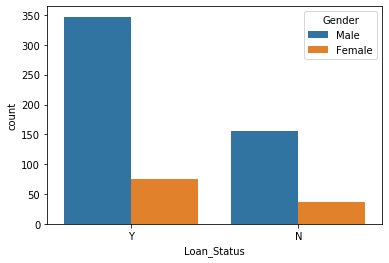

In [80]:
sns.countplot(x= train1['Loan_Status'],data = train1, hue= 'Gender')

### male have high chance of getting loan. But as have less female in our data me can't say much

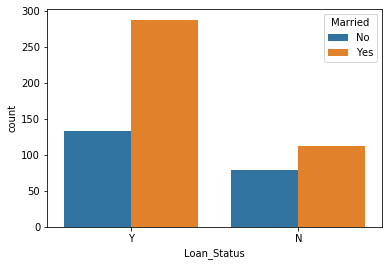

In [81]:
sns.countplot(x= train1['Loan_Status'],data = train1, hue= 'Married')

###  married pearson have high chance of getting loan

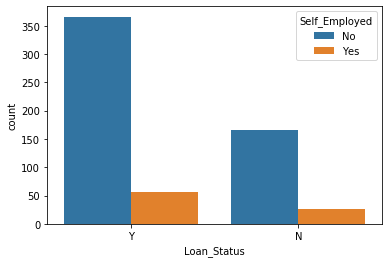

In [82]:
sns.countplot(x= train1['Loan_Status'],data = train1, hue= 'Self_Employed')

### can't say much

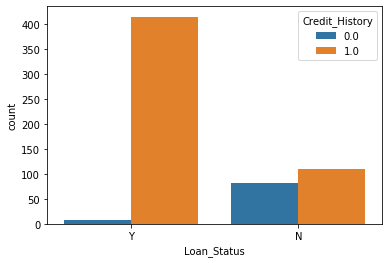

In [83]:
sns.countplot(x= train1['Loan_Status'],data = train1, hue= 'Credit_History')

### 0 credit history have less chance of getting loan

In [86]:
train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_term
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y,360.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,360.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,360.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,360.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,360.0


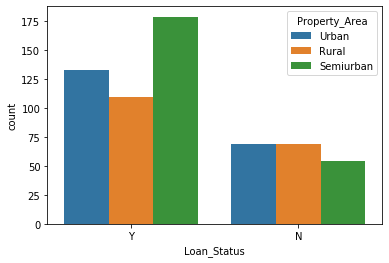

In [87]:
sns.countplot(x= train1['Loan_Status'],data = train1, hue= 'Property_Area')

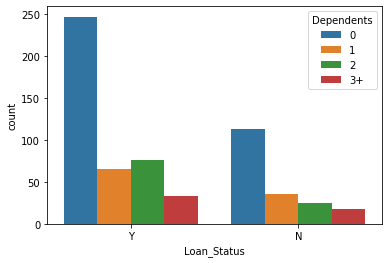

In [88]:
sns.countplot(x= train1['Loan_Status'],data = train1, hue= 'Dependents')

### let drop some feature which are not too important

In [92]:
to_drop = ['Loan_ID','Property_Area','Dependents']
train2 = train1.drop(to_drop,1)
train2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Loan_term
0,Male,No,Graduate,No,5849,0.0,128.0,1.0,Y,360.0
1,Male,Yes,Graduate,No,4583,1508.0,128.0,1.0,N,360.0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,1.0,Y,360.0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,1.0,Y,360.0
4,Male,No,Graduate,No,6000,0.0,141.0,1.0,Y,360.0


In [93]:
test2 = test.drop(to_drop,1)
test2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,Yes,Graduate,No,5720,0,110.0,360.0,1.0
1,Male,Yes,Graduate,No,3076,1500,126.0,360.0,1.0
2,Male,Yes,Graduate,No,5000,1800,208.0,360.0,1.0
3,Male,Yes,Graduate,No,2340,2546,100.0,360.0,NaN
4,Male,No,Not Graduate,No,3276,0,78.0,360.0,1.0


### cleaning test dataset

In [94]:
test2.isna().sum()

Gender               11
Married               0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
dtype: int64

In [95]:
test2.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [96]:
test2['Gender'].fillna('Male',inplace=True)
test2.Gender.value_counts()

Male      297
Female     70
Name: Gender, dtype: int64

In [97]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
Gender               367 non-null object
Married              367 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 25.9+ KB


In [98]:
test2.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [99]:
test2['Self_Employed'].fillna('No',inplace=True)
test2.Self_Employed.value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [102]:
test2['LoanAmount'].fillna(test2['LoanAmount'].median(),inplace=True)

In [107]:
test2.Loan_Amount_Term.mode()

0    360.0
dtype: float64

In [114]:
test2['Loan_Amount_Term'].fillna(test2['Loan_Amount_Term'].median(),inplace=True)

In [115]:
test2.isna().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
dtype: int64

In [117]:
test2.Credit_History.median()

1.0

In [118]:
test2['Credit_History'].fillna(test2['Credit_History'].median(),inplace=True)

In [119]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
Gender               367 non-null object
Married              367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 25.9+ KB


In [120]:
test2['Loan_term'] = test2['Loan_Amount_Term']
test2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_term
0,Male,Yes,Graduate,No,5720,0,110.0,360.0,1.0,360.0
1,Male,Yes,Graduate,No,3076,1500,126.0,360.0,1.0,360.0
2,Male,Yes,Graduate,No,5000,1800,208.0,360.0,1.0,360.0
3,Male,Yes,Graduate,No,2340,2546,100.0,360.0,1.0,360.0
4,Male,No,Not Graduate,No,3276,0,78.0,360.0,1.0,360.0


In [121]:
test2 = test2.drop('Loan_Amount_Term',1)
test2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_term
0,Male,Yes,Graduate,No,5720,0,110.0,1.0,360.0
1,Male,Yes,Graduate,No,3076,1500,126.0,1.0,360.0
2,Male,Yes,Graduate,No,5000,1800,208.0,1.0,360.0
3,Male,Yes,Graduate,No,2340,2546,100.0,1.0,360.0
4,Male,No,Not Graduate,No,3276,0,78.0,1.0,360.0


In [122]:
test2.isna().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Loan_term            0
dtype: int64

In [124]:
train2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Loan_term
0,Male,No,Graduate,No,5849,0.0,128.0,1.0,Y,360.0
1,Male,Yes,Graduate,No,4583,1508.0,128.0,1.0,N,360.0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,1.0,Y,360.0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,1.0,Y,360.0
4,Male,No,Graduate,No,6000,0.0,141.0,1.0,Y,360.0


In [125]:
train2['Loan_Status'] = train2['Loan_Status'].apply(lambda x: 0 if x == 'N' else 1)
train2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Loan_term
0,Male,No,Graduate,No,5849,0.0,128.0,1.0,1,360.0
1,Male,Yes,Graduate,No,4583,1508.0,128.0,1.0,0,360.0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,1.0,1,360.0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,1.0,1,360.0
4,Male,No,Graduate,No,6000,0.0,141.0,1.0,1,360.0


In [126]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
Gender               614 non-null object
Married              614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
Loan_term            614 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 48.0+ KB


### create dummy variables for categorical features

In [128]:
dummie_col = ['Gender','Married','Education','Self_Employed','Credit_History']

In [130]:
dummies = pd.get_dummies(train2[dummie_col])
dummies.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,1.0,0,1,1,0,1,0,1,0
1,1.0,0,1,0,1,1,0,1,0
2,1.0,0,1,0,1,1,0,0,1
3,1.0,0,1,0,1,0,1,1,0
4,1.0,0,1,1,0,1,0,1,0


In [132]:
dummies = dummies.drop('Credit_History',1)
dummies.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,1,1,0,1,0,1,0
1,0,1,0,1,1,0,1,0
2,0,1,0,1,1,0,0,1
3,0,1,0,1,0,1,1,0
4,0,1,1,0,1,0,1,0


In [133]:
train3 = pd.concat([train2,dummies],axis='columns')
train3.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Loan_term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,Male,No,Graduate,No,5849,0.0,128.0,1.0,1,360.0,0,1,1,0,1,0,1,0
1,Male,Yes,Graduate,No,4583,1508.0,128.0,1.0,0,360.0,0,1,0,1,1,0,1,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,1.0,1,360.0,0,1,0,1,1,0,0,1
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,1.0,1,360.0,0,1,0,1,0,1,1,0
4,Male,No,Graduate,No,6000,0.0,141.0,1.0,1,360.0,0,1,1,0,1,0,1,0


In [134]:
train4 = train3.drop(['Gender','Married','Education','Self_Employed'], 1)
train4.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Loan_term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,128.0,1.0,1,360.0,0,1,1,0,1,0,1,0
1,4583,1508.0,128.0,1.0,0,360.0,0,1,0,1,1,0,1,0
2,3000,0.0,66.0,1.0,1,360.0,0,1,0,1,1,0,0,1
3,2583,2358.0,120.0,1.0,1,360.0,0,1,0,1,0,1,1,0
4,6000,0.0,141.0,1.0,1,360.0,0,1,1,0,1,0,1,0


In [135]:
test2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_term
0,Male,Yes,Graduate,No,5720,0,110.0,1.0,360.0
1,Male,Yes,Graduate,No,3076,1500,126.0,1.0,360.0
2,Male,Yes,Graduate,No,5000,1800,208.0,1.0,360.0
3,Male,Yes,Graduate,No,2340,2546,100.0,1.0,360.0
4,Male,No,Not Graduate,No,3276,0,78.0,1.0,360.0


In [136]:
dum_col = ['Gender','Married','Education','Self_Employed']

In [137]:
dums = pd.get_dummies(test2[dum_col])
dums.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,1,0,1,1,0,1,0
1,0,1,0,1,1,0,1,0
2,0,1,0,1,1,0,1,0
3,0,1,0,1,1,0,1,0
4,0,1,1,0,0,1,1,0


In [138]:
test3 = pd.concat([test2,dums],axis='columns')
test3.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,Male,Yes,Graduate,No,5720,0,110.0,1.0,360.0,0,1,0,1,1,0,1,0
1,Male,Yes,Graduate,No,3076,1500,126.0,1.0,360.0,0,1,0,1,1,0,1,0
2,Male,Yes,Graduate,No,5000,1800,208.0,1.0,360.0,0,1,0,1,1,0,1,0
3,Male,Yes,Graduate,No,2340,2546,100.0,1.0,360.0,0,1,0,1,1,0,1,0
4,Male,No,Not Graduate,No,3276,0,78.0,1.0,360.0,0,1,1,0,0,1,1,0


In [139]:
test4 = test3.drop(dum_col,1)
test4.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5720,0,110.0,1.0,360.0,0,1,0,1,1,0,1,0
1,3076,1500,126.0,1.0,360.0,0,1,0,1,1,0,1,0
2,5000,1800,208.0,1.0,360.0,0,1,0,1,1,0,1,0
3,2340,2546,100.0,1.0,360.0,0,1,0,1,1,0,1,0
4,3276,0,78.0,1.0,360.0,0,1,1,0,0,1,1,0


In [140]:
test4.shape

(367, 13)

In [141]:
train4.shape

(614, 14)

In [143]:
train4.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Loan_term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
ApplicantIncome,1.000000,-0.116605,0.565181,-0.018615,-0.004710,-0.046531,-0.058809,0.058809,-0.051708,0.051708,0.140760,-0.140760,-0.127180,0.127180
CoapplicantIncome,-0.116605,1.000000,0.189218,0.011134,-0.059187,-0.059383,-0.082912,0.082912,-0.075948,0.075948,0.062290,-0.062290,0.016100,-0.016100
LoanAmount,0.565181,0.189218,1.000000,-0.000607,-0.033214,0.036960,-0.106904,0.106904,-0.146546,0.146546,0.168759,-0.168759,-0.115100,0.115100
Credit_History,-0.018615,0.011134,-0.000607,1.000000,0.540556,-0.004705,-0.009170,0.009170,-0.010938,0.010938,0.073658,-0.073658,0.001550,-0.001550
Loan_Status,-0.004710,-0.059187,-0.033214,0.540556,1.000000,-0.022549,-0.017987,0.017987,-0.091478,0.091478,0.085884,-0.085884,0.003700,-0.003700
Loan_term,-0.046531,-0.059383,0.036960,-0.004705,-0.022549,1.000000,0.074030,-0.074030,0.100912,-0.100912,0.073928,-0.073928,0.033739,-0.033739
Gender_Female,-0.058809,-0.082912,-0.106904,-0.009170,-0.017987,0.074030,1.000000,-1.000000,0.364569,-0.364569,0.045364,-0.045364,-0.000525,0.000525
Gender_Male,0.058809,0.082912,0.106904,0.009170,0.017987,-0.074030,-1.000000,1.000000,-0.364569,0.364569,-0.045364,0.045364,0.000525,-0.000525
Married_No,-0.051708,-0.075948,-0.146546,-0.010938,-0.091478,0.100912,0.364569,-0.364569,1.000000,-1.000000,0.012304,-0.012304,0.004489,-0.004489
Married_Yes,0.051708,0.075948,0.146546,0.010938,0.091478,-0.100912,-0.364569,0.364569,-1.000000,1.000000,-0.012304,0.012304,-0.004489,0.004489


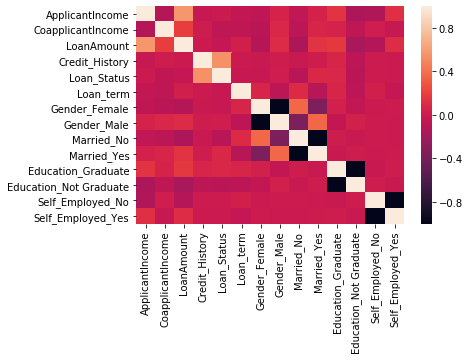

In [144]:
corr = train4.corr()
sns.heatmap(corr)

In [145]:
train4.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Loan_term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,128.0,1.0,1,360.0,0,1,1,0,1,0,1,0
1,4583,1508.0,128.0,1.0,0,360.0,0,1,0,1,1,0,1,0
2,3000,0.0,66.0,1.0,1,360.0,0,1,0,1,1,0,0,1
3,2583,2358.0,120.0,1.0,1,360.0,0,1,0,1,0,1,1,0
4,6000,0.0,141.0,1.0,1,360.0,0,1,1,0,1,0,1,0


In [147]:
X = train4.drop('Loan_Status',1)
y = train4['Loan_Status']

In [148]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,128.0,1.0,360.0,0,1,1,0,1,0,1,0
1,4583,1508.0,128.0,1.0,360.0,0,1,0,1,1,0,1,0
2,3000,0.0,66.0,1.0,360.0,0,1,0,1,1,0,0,1
3,2583,2358.0,120.0,1.0,360.0,0,1,0,1,0,1,1,0
4,6000,0.0,141.0,1.0,360.0,0,1,1,0,1,0,1,0


In [149]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## Model Selection 

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [151]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [153]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7967479674796748

In [154]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7479674796747967

In [155]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

-0.06034482758620662

### from above logisticRegression came out with good score

In [160]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

## We will use GridSearchCV

In [163]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'max_depth': range(1, 8),
                'max_leaf_nodes': range(2, 6)
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

,model,best_score,best_params
0,linear_regression,0.277764,{'normalize': False}
1,decision_tree,-0.326323,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,random_forest,0.806504,"{'max_depth': 6, 'max_leaf_nodes': 5}"


### From above we are getting a great score. So, Random Forest is our best model.

In [165]:
train3.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Loan_term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,Male,No,Graduate,No,5849,0.0,128.0,1.0,1,360.0,0,1,1,0,1,0,1,0
1,Male,Yes,Graduate,No,4583,1508.0,128.0,1.0,0,360.0,0,1,0,1,1,0,1,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,1.0,1,360.0,0,1,0,1,1,0,0,1
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,1.0,1,360.0,0,1,0,1,0,1,1,0
4,Male,No,Graduate,No,6000,0.0,141.0,1.0,1,360.0,0,1,1,0,1,0,1,0


## Training the best model

In [166]:
from sklearn.metrics import accuracy_score

In [167]:
rf = RandomForestClassifier(max_depth = 6, max_leaf_nodes=5).fit(X_train, y_train)
accuracy_score(y_train, rf.predict(X_train)), accuracy_score(y_test, rf.predict(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.8187372708757638, 0.7967479674796748)

In [169]:
def predict_price(Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_term):    
    loc_index = np.where(X.columns==Gender)[0][0]
    loc_index = np.where(X.columns==Married)[0][0]
    loc_index = np.where(X.columns==Education)[0][0]
    loc_index = np.where(X.columns==Self_Employed)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = ApplicantIncome
    x[1] = CoapplicantIncome
    x[2] = LoanAmount
    x[3] = Credit_History
    x[4] = Loan_term
    if loc_index >= 0:
        x[loc_index] = 1

    return rf.predict([x])[0]

In [170]:
train3.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Loan_term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,Male,No,Graduate,No,5849,0.0,128.0,1.0,1,360.0,0,1,1,0,1,0,1,0
1,Male,Yes,Graduate,No,4583,1508.0,128.0,1.0,0,360.0,0,1,0,1,1,0,1,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,1.0,1,360.0,0,1,0,1,1,0,0,1
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,1.0,1,360.0,0,1,0,1,0,1,1,0
4,Male,No,Graduate,No,6000,0.0,141.0,1.0,1,360.0,0,1,1,0,1,0,1,0


In [171]:
predict_price('Gender_Male','Married_No','Education_Graduate','Self_Employed_No',5849, 0.0, 128.0, 1.0,360.0)

1

In [180]:
test4.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5720,0,110.0,1.0,360.0,0,1,0,1,1,0,1,0
1,3076,1500,126.0,1.0,360.0,0,1,0,1,1,0,1,0
2,5000,1800,208.0,1.0,360.0,0,1,0,1,1,0,1,0
3,2340,2546,100.0,1.0,360.0,0,1,0,1,1,0,1,0
4,3276,0,78.0,1.0,360.0,0,1,1,0,0,1,1,0


In [182]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Predicting the test.csv using our best model

In [183]:
X_predict = test4

pd_results = pd.DataFrame(rf.predict(X_predict), index = test.Loan_ID, columns = ['Loan_Status'])
pd_results.Loan_Status = pd_results.Loan_Status.apply(lambda x: 'Y' if x ==1 else 'N')
pd_results

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
LP001054,Y
LP001055,Y
LP001056,N
LP001059,Y


In [184]:
pd_results.Loan_Status.value_counts()

Y    307
N     60
Name: Loan_Status, dtype: int64

## Model Submission

In [185]:
pd_results.to_csv('results.csv')